running
0.08852974970751082
-1.0529107636217943


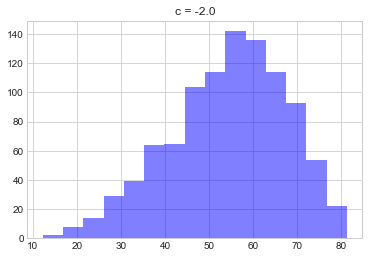

0.3294058778623977
-0.4822686556203343


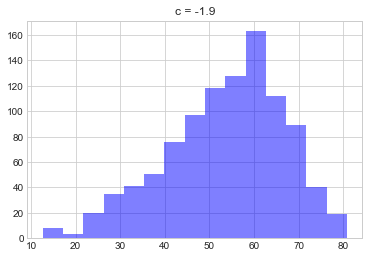

0.2084729112052206
-0.6809503688839721


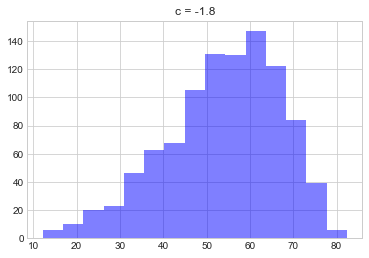

0.1456338750576558
-0.8367375945320917


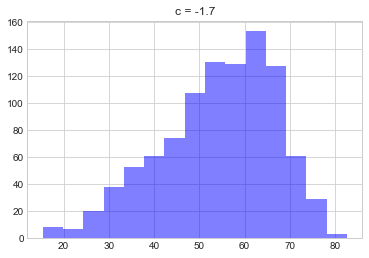

Imonte: []
SINI: []
0.10557009590594069
-0.9764590839069067


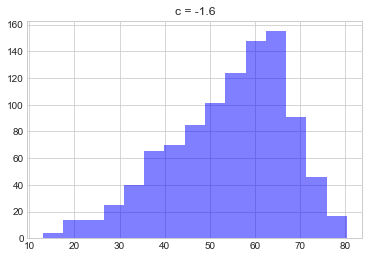

0.17953462761884376
-0.7458517747546662


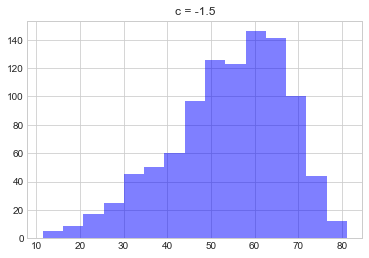

Imonte: []
SINI: []
0.12820788772002856
-0.8920852549427487


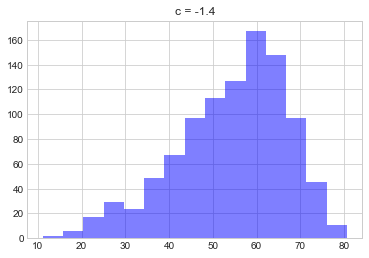

0.4114340996728052
-0.3856997168075092


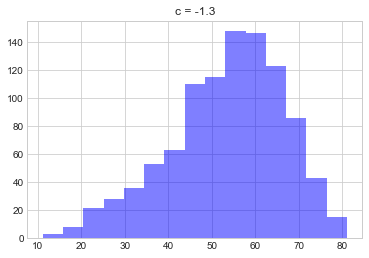

0.1843278904636142
-0.7344089471573723


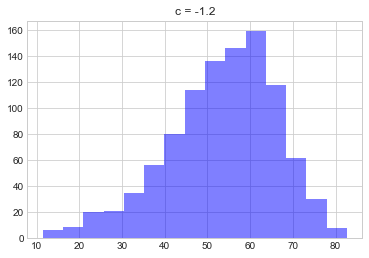

0.2687199539781936
-0.5707000835449955


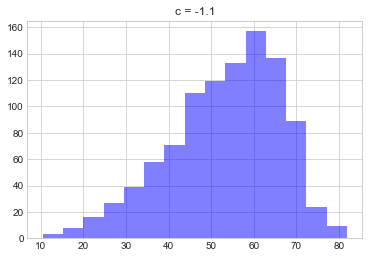

0.20059872326943895
-0.6976718354173058


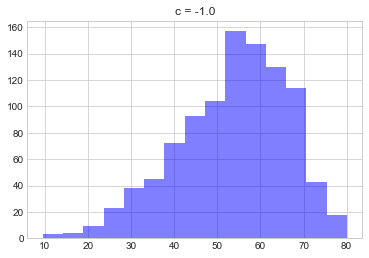

0.20450665420430703
-0.6892925564234061


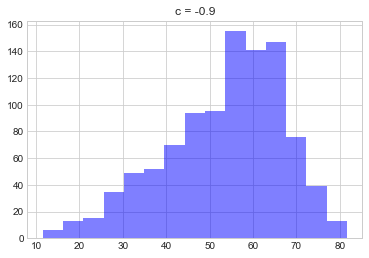

0.47611139085874943
-0.3222914280026564


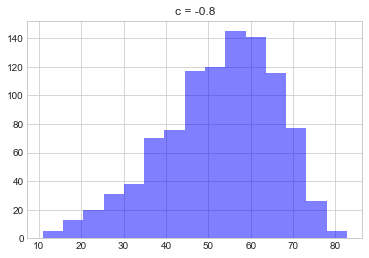

0.24685820329298835
-0.607552436256146


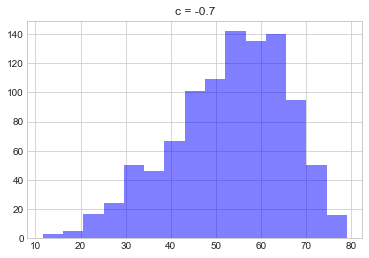

0.22492924367468903
-0.6479540770636684


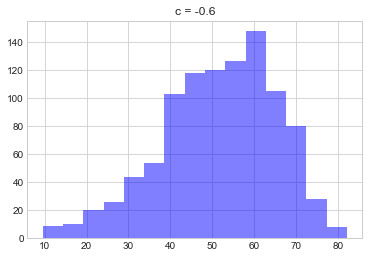

Imonte: []
SINI: []
0.5585260911480412
-0.2529565343174836


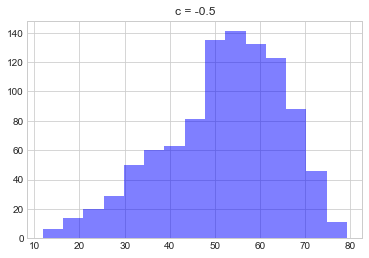

0.0665788596433099
-1.17666364767228


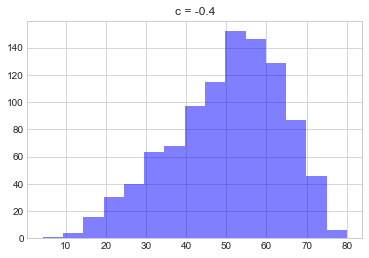

0.006914173273049551
-2.1602597409946025


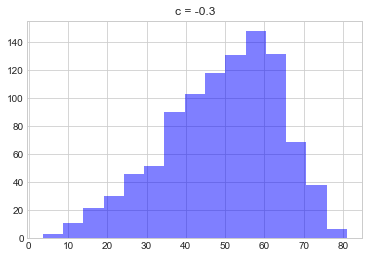

2.6199337639143394e-05
-4.58170968819557


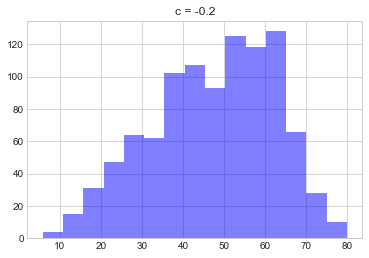

2.1429861514210558e-06
-5.668980635482133


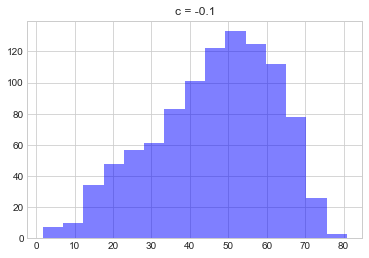

6.323751167158775e-08
-7.199025227426733


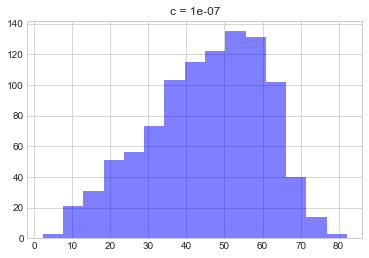

1.6044062300935025e-08
-7.794685660271806


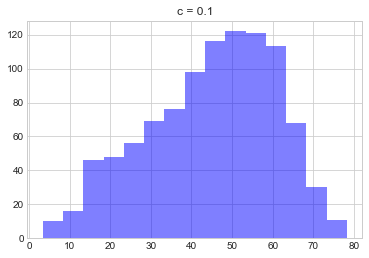

1.0308179865248235e-09
-8.986818012142544


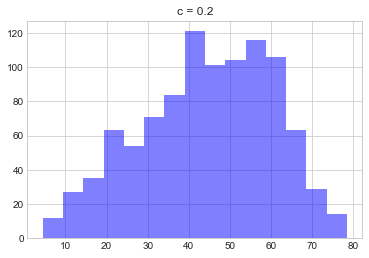

6.005612451787101e-09
-8.22144269669262


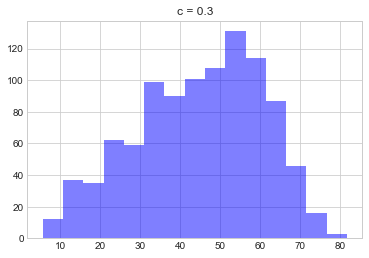

1.7986304667871877e-09
-8.745058054397767


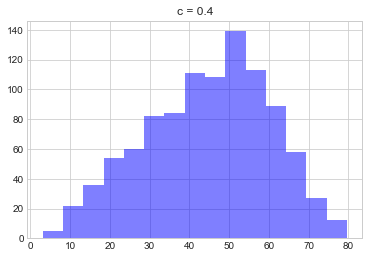

1.973361474227886e-10
-9.704793354746027


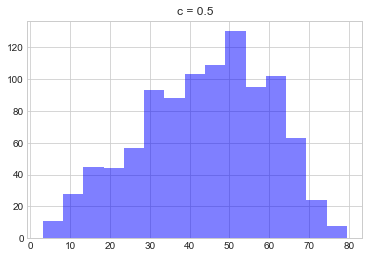

4.983107260159159e-10
-9.30249976464634


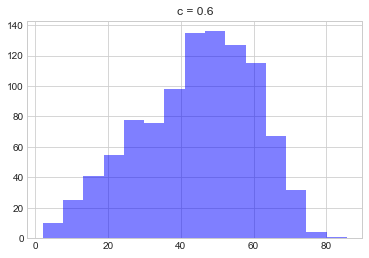

2.105771224059083e-09
-8.676588813362155


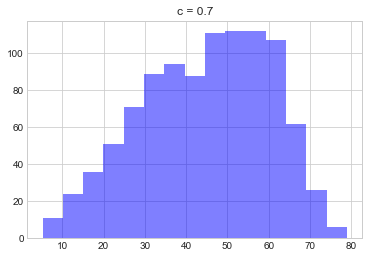

1.0516553183848032e-09
-8.978126577532013


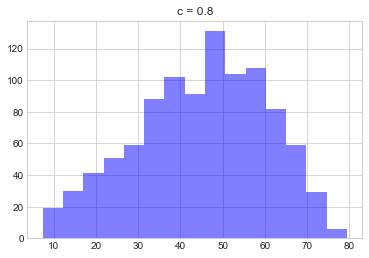

5.253575352526241e-13
-12.279545034235111


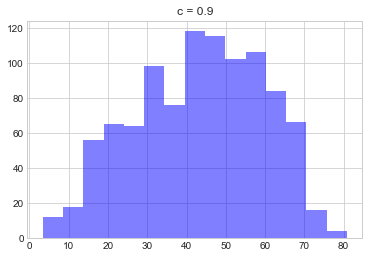

1.1621599238509361e-09
-8.934734104934492


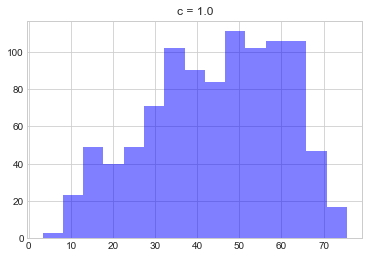

1.1855803006000087e-09
-8.92606902546781


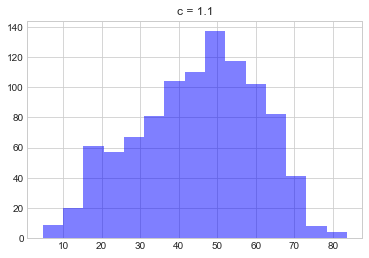

4.165334743788662e-12
-11.380350091126692


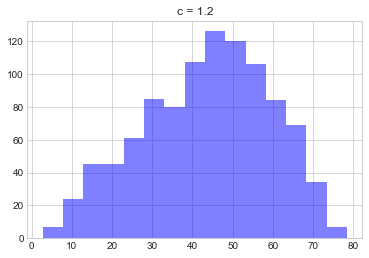

6.2408966883253925e-12
-11.204753006661477


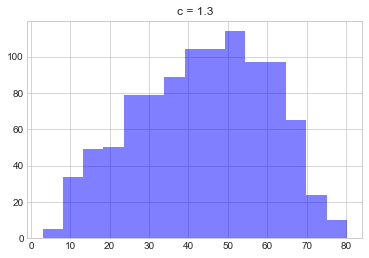

4.0333403283909774e-11
-10.394335131201816


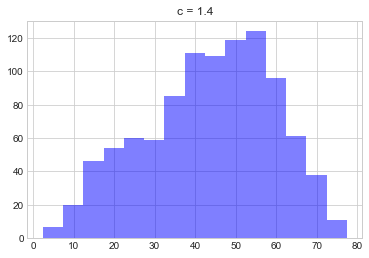

8.780161042665213e-10
-9.056497518342253


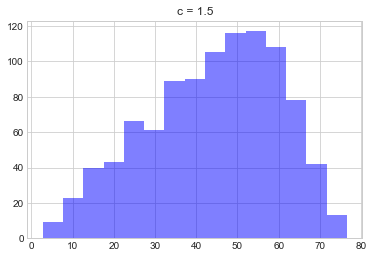

1.0184630916398874e-11
-10.992054704894127


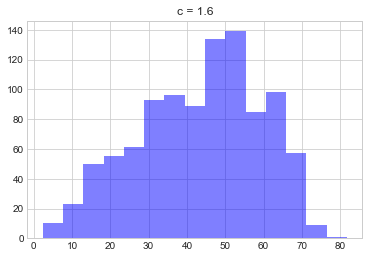

2.7950399772436185e-08
-7.5536119760522835


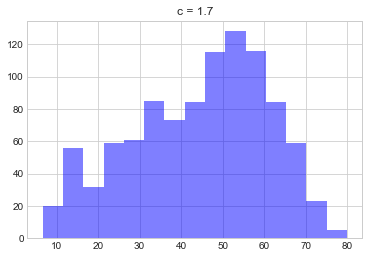

4.983107260159159e-10
-9.30249976464634


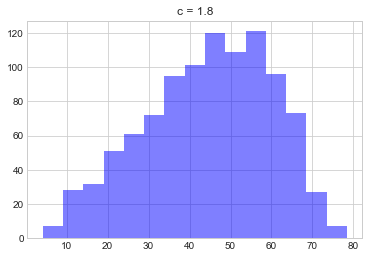

7.939917612276304e-10
-9.10018400396074


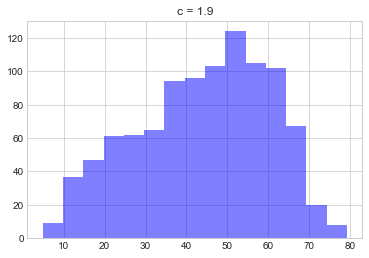

4.790190466508193e-11
-10.319647217919684


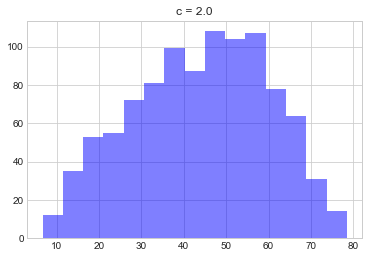

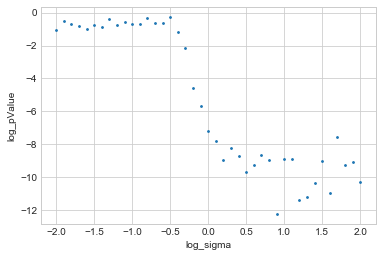

In [7]:
'''
generates fake data set by drawing cosI values from a truncated normal distribution with mean = 0
- the sigma ranges from 10^-2 to 10^2 and lower sigma values fit better with the distribution of real data
- histograms = observed inclinations
'''

import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_linear_regression
import csv
import pandas
import statistics
import random
import math
from scipy.stats import ks_2samp
from scipy.stats import truncnorm


data = genfromtxt('starsData.csv',delimiter=',',dtype='float')
#cols: vsini, e_vsini, prot, e_prot, radius, e_r
#e_prot of 0 means no error given
rows,cols=data.shape

RSun = 695700

width = int(2)
height = int(41)

grid = np.zeros((height,width))
print('running')
c = -20.0
for i in range(height):
    if c == 0:
        c = 0.000001
    grid[i][0] = c/10
    if c==0.000001:
        c = c-0.000001
    c = c+1

for i in range(height):
    IsummaryMedian = []
    IsummaryMean = []
    ItrueList = []
    c = grid[i][0]
   # try:
    runMonte(data,c,IsummaryMedian,IsummaryMean,ItrueList)
    with open("trunciList.txt", 'w') as f:
        for num in IsummaryMedian:
            f.write(str(num)+'\n')

    pValue = KSTest()
    print(pValue)
    log_pValue = math.log10(pValue)
    grid[i][1] = log_pValue
    print(log_pValue)

    for i in range(0,len(ItrueList)):
        ItrueList[i]=math.degrees(ItrueList[i])
            
   # plt.hist(ItrueList,bins = 15, edgecolor='red', linewidth= 2,histtype = 'step')
    plt.hist(IsummaryMedian, bins = 15,color = 'blue', alpha = 0.5)
    plt.title('c = ' + str(c))
    plt.show()

try:
    log_pValues = []
    cValues = []

    for i in range(height):
        cValues.append(grid[i][0])
        log_pValues.append(grid[i][1])

    with open("trun_cValues.txt", 'w') as f:
        for num in cValues:
            f.write(str(num)+'\n')
    with open("trunc_log_pValues.txt", 'w') as f:
        for num in log_pValues:
            f.write(str(num)+'\n')
    plt.scatter(cValues, log_pValues, s=np.pi)
    #plt.plot(p, Y_pred, color='red')
    #plt.errorbar(p, v, yerr=e_v, fmt='.k')
   # plt.ylim(0, 0.1)
    plt.xlabel("log_sigma")
    plt.ylabel("log_pValue")
    plt.show()
except:
    print('error pt 2')


In [2]:
def runMonte(data,c,IsummaryMedian,IsummaryMean,ItrueList):
    for j in range(0,1000):
        cosIList = []
        #Rtrue = np.random.normal(random.choice(data[:,4]),random.choice(data[:,5]))
        #Ptrue = np.random.normal(random.choice(data[:,2]),random.choice(data[:,3]))
        index1 = random.randint(0,224)
        Rtrue = data[index1,4]
        e_Rtrue = data[index1,5]

        index2 = random.randint(0,224)
        Ptrue = data[index2,2]
        e_Ptrue = data[index2,3]
        Vtrue = 2*np.pi*Rtrue*RSun/(Ptrue*24*3600)

        cosI = 99
        while cosI >1:
            x = np.random.normal(0,10**c)
            if x >=0 and x<=1:
                cosI = x
        cosI_random = cosI

        Itrue = np.arccos(cosI_random)
        
        ItrueList.append(Itrue)        

        VSINItrue = Vtrue*np.sin(Itrue)

        e_VSINIobs = random.choice(data[:,1])
        VSINIobs = np.random.normal(VSINItrue,e_VSINIobs)
        Robs = np.random.normal(Rtrue,e_Rtrue)
        e_Robs = e_Rtrue
        Pobs = np.random.normal(Ptrue,e_Ptrue)
        e_Pobs = e_Ptrue

        Pmonte = np.random.normal(Pobs,e_Pobs,10000)
        Rmonte = np.random.normal(Robs,e_Robs,10000)
        VSINImonte = np.random.normal(VSINIobs,e_VSINIobs,10000)

        iSINImonte = VSINImonte/(2*np.pi*Rmonte*RSun/(Pmonte*24*3600))
        SINImonte = []

        #rint(iSINImonte)
        for num in iSINImonte:
            if num>= 0 and num <=1:
                SINImonte.append(num)

        Imonte = np.arcsin(SINImonte)


        for i in range(0,len(Imonte)):
            Imonte[i]=math.degrees(Imonte[i])
       #print(Imonte)
        try:
            IsummaryMedian.append(statistics.median(Imonte))
            IsummaryMean.append(statistics.mean(Imonte))
        except:
            print('Imonte: '+str(Imonte))
            print('SINI: ' + str(SINImonte))
        #print('done')


In [3]:
def KSTest():
    i_all = fileToList('i_all.txt')
    i_modBeta = fileToList('trunciList.txt')
    result = ks_2samp(i_all,i_modBeta)
    return result.pvalue



In [4]:
def fileToList(name):
    my_file = open(name, "r")
    content = my_file.read()
    content_list = content.strip().split("\n")
    my_file.close()
    
    for i in range(len(content_list)):
        content_list[i]=float(content_list[i])
    return content_list